In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

cityCourtsAndRinks = pd.read_csv('https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227')

cityCourtsAndRinks_dict = dict()

for i in range(len(cityCourtsAndRinks)):

    item = cityCourtsAndRinks.loc[i, 'neighborhood']
    
    if item in cityCourtsAndRinks_dict: 
        cityCourtsAndRinks_dict[item] += 1 
    else:
        cityCourtsAndRinks_dict[item] = 1 

cityCourtsAndRinks_series = pd.Series(cityCourtsAndRinks_dict, name = "Courts")

cityCourtsAndRinks_series.sort_values()[:]

Middle Hill             1
Perry South             1
Strip District          1
Allentown               1
Hays                    1
                       ..
Beltzhoover             9
Brookline               9
Hazelwood              10
Highland Park          20
Squirrel Hill South    26
Name: Courts, Length: 63, dtype: int64

In [2]:
cityCourtsAndRinks_series.sort_values(ascending=False)[:10]

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Allegheny Center        9
Troy Hill               8
Beechview               7
South Side Slopes       6
Lower Lawrenceville     6
Name: Courts, dtype: int64

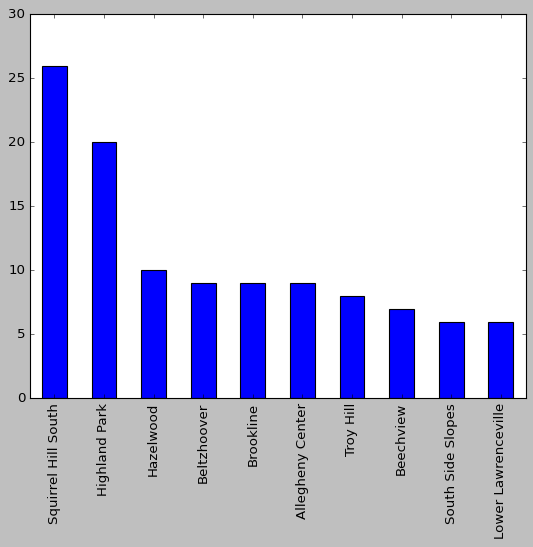

In [3]:
plt.style.use('classic')
cityCourtsAndRinks_series.sort_values(ascending=False)[:10].plot.bar()

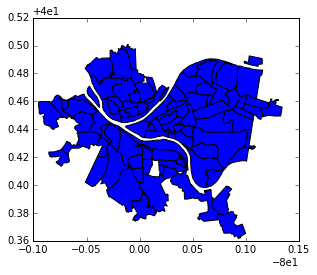

In [4]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [10]:
import pandas as pd
import geopandas as gpd
%matplotlib inline


cityCourtsAndRinks = pd.read_csv('https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227')

cityCourtsAndRinks['coordinates'] = cityCourtsAndRinks[['longitude','latitude']].values.tolist()
from shapely.geometry import Point
cityCourtsAndRinks['coordinates'] = cityCourtsAndRinks['coordinates'].apply(Point)
cityCourtsAndRinks.head()

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,coordinates
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104,POINT (-80.00810437 40.45444322)
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531,POINT (-80.01253059 40.45239978)
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150,POINT (-80.01214999 40.4522382)
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767,POINT (-80.01176728999999 40.45207492)
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305,POINT (-80.02230466 40.41415163)


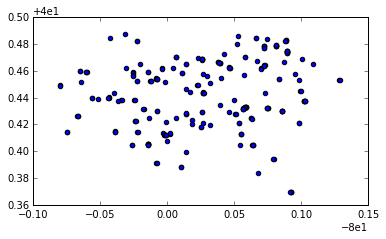

In [11]:
cr = gpd.GeoDataFrame(cityCourtsAndRinks, geometry = 'coordinates')
cr.plot()

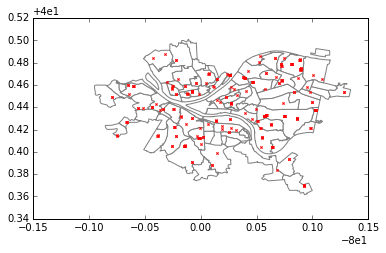

In [12]:
base = neighborhoods.plot(color='white', edgecolor='gray')
cr.plot(ax=base, marker='x', color='red', markersize=5);